In [2]:
import pandas as pd

data_path = "../Resources/"
adv = pd.read_csv(data_path+"Advertising.csv", index_col=0)
adv.head()



,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
import numpy as np
# Y is a response variable
Y = sales = adv['sales']
# Antag att regressionen av 'TV'  p[ 'sales' är ungefär i lnje
# B = Beta
# Y = B1 X
# B0 = M = Skärningspunkt = Bias
# B1 = Lutningen
# sales = B0 + B1 dot 'TV'
# Modellspecificationsmatrisen
X = TV = np.column_stack([np.ones(Y.shape[0]), adv['TV']])
X


array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
       [  1. ,   8.7],
       [  1. ,  57.5],
       [  1. , 120.2],
       [  1. ,   8.6],
       [  1. , 199.8],
       [  1. ,  66.1],
       [  1. , 214.7],
       [  1. ,  23.8],
       [  1. ,  97.5],
       [  1. , 204.1],
       [  1. , 195.4],
       [  1. ,  67.8],
       [  1. , 281.4],
       [  1. ,  69.2],
       [  1. , 147.3],
       [  1. , 218.4],
       [  1. , 237.4],
       [  1. ,  13.2],
       [  1. , 228.3],
       [  1. ,  62.3],
       [  1. , 262.9],
       [  1. , 142.9],
       [  1. , 240.1],
       [  1. , 248.8],
       [  1. ,  70.6],
       [  1. , 292.9],
       [  1. , 112.9],
       [  1. ,  97.2],
       [  1. , 265.6],
       [  1. ,  95.7],
       [  1. , 290.7],
       [  1. , 266.9],
       [  1. ,  74.7],
       [  1. ,  43.1],
       [  1. , 228. ],
       [  1. , 202.5],
       [  1. , 177. ],
       [  1. , 293.6],
       [  1

-1=T
` = matricmultiplication(?)
$\hat{\beta} = \textbf{b}(bold) = (X`X)^-1X`\textbf{y}$


In [4]:
# pesudo-ivers för prestandard
b = np.linalg.pinv(X.T @ X) @ X.T @ Y
b

array([7.03259355, 0.04753664])

$y(hat) = \Beta_0 + \Beta_1x$

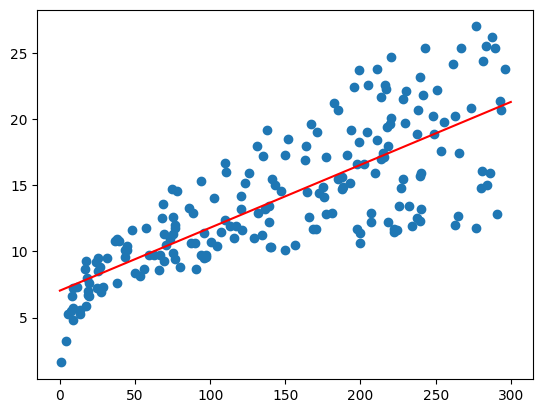

In [5]:
# Förhållandet mellan TV reklam och försäljing
import matplotlib.pyplot as plt 
plt.scatter(X[:, 1], Y)
x = np.linspace(0,300)
y_hat = b[0] + b[1]*x
plt.plot(x, y_hat, c="red")


# Regresion linjen kan skilja sig ifrån sample till sample

In [6]:
# RSS Residual Sum of Squares (NOTE Regression sum of square har samma acronym RSS)
# SSE Sum of Square Erros
# (RSS == SSE)(?)

# RSS aka SSE är vad vi försöker minimera med vår LSM (Least Squares Method)
n = Y.shape[0]
# antalet parametrar TV i detta fall, så 1
v = X.shape[1] - 1

SSE = np.sum(np.square(Y - (X @ b)))
SSE

2102.5305831313512

In [7]:
# Kovariance om en variable ändras så påverkar detta en annan variable
# Om kovariance är 0 så är dom oberoende
# Men om kovariances är possitiv eller neggativ så betyder det inte nödvändigt vis 
# att coefficienterna är beroende

$\texttt{Cov}(X, Y) = E[(X - \mu x)(Y - \mu y)]$
#
$\texttt{Cov}(X, Y) = E[(X - \mu x)(Y - \mu y)] = E[XY] - E[X]E[Y]$
#
$S_{xy} \rightarrow (X - \mu x)(Y - \mu y)$

$S == Population\;aka\;Sample\;Space$

##### Om x och Y är oberoende så är Cov(X, Y) = 0, men vi kan inte anta det omvända. Dvs Cov=0 betyder inte nödvändigtvis att X och Y är oberoende, men det är åtminstone inte linjärt beroende.

##### Kovarians säger inte att det finns ett samband bara att de rör sig åt samma håll 
##### Korrelation säger att det fins ett samband och ligger mellan -1 och 1
##### En starkare egenskap är korrelation (Pearson coefficient of correlation), som är ett värde mellan och inklusive -1 och 1. 
##### Låt $X$ och $Y$ vara slumpvariabler med medel $\mu_Y$ respetive $\mu_Y$ samt varianser $\sigma_X^2$ och $\sigma_Y^2$  
##### Korrelationen mellan $X$ och $Y$ ges då av:  
\begin{equation*}
$$\rho_{XY} = \frac{\texttt{Cov(X, Y)}}{\sqrt{((\texttt{Var} X)(\texttt{Var} Y))}}$$
\end{equation*}

Om Personkoefficienten är 1 eller -1 ($|\rho XY|=1$) då har vi visat att det finns en ekvation: $Y = \beta_0 + \beta_1X$


##### Standardfel (kring medlet):
$$\frac{\sigma^2}{2}$$

In [8]:
# Stickprovet
var = SSE/(n-v-1)
S = np.sqrt(var) # Residual standard error, altså en uppskatning av standardfelet/ stickprovsavvikelsen
S
# Sum of squares Regression
SSR = np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y)/n))
SSR
Syy = np.sum(np.square(Y)) - (np.square(np.sum(Y))/n)

# Standard error (of the mean)
se = var / n 

# Sqaure of standard error of B1 = var/Sxx
Sxx = np.sum(np.square(X)) - (np.square(np.sum(X))/n)
se_b = var/Sxx

# confirence intervall
ci = (b[1], 2*np.sqrt(se_b))
print(f"Confidence interval on predictor B1: {ci[0]:.4f} +- {ci[1]:.4f}")
#> # Stickprovet
var = SSE/(n-v-1)
S = np.sqrt(var) # Residual standard error, altså en uppskatning av standardfelet/ stickprovsavvikelsen
S
# Sum of squares Regression
SSR = np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y)/n))
SSR
Syy = np.sum(np.square(Y)) - (np.square(np.sum(Y))/n)

# Standard error (of the mean)
se = var / n 

# Sqaure of standard error of B1 = var/Sxx
Sxx = np.sum(np.square(X)) - (np.square(np.sum(X))/n)
se_b = var/Sxx

# confirence intervall
ci = (b[1], 2*np.sqrt(se_b))
print(f"Confidence interval on predictor B1: {ci[0]:.4f} +- {ci[1]:.4f}")
#>> Confidence interval on predictor B1: 0.0475 +- 0.0055

# Om stickproven har sama medel så förväntar vi oss att det hamnar mellan ovan
# Detta är väldigt ungefärligt ett 90% interval (2\sigma). Om vi k;r regressionen många 
# gånger på delmängden av datan (som skall ha samma medel, dvs vara balanserad) så
# väntar vi oss att 90% av värden hamnar mellan 0.052 och 0.042
# När värdet inte är inom intervallet då är dom outliers och vi kan inte dra några
# slutsatser alls, dom kan ha vilket värde som helst

# Så för varjet 1000$ vi spenderare så kommer vi sälja 0.042 till 0.053 enheter mer 


Confidence interval on predictor B1: 0.0475 +- 0.0055
Confidence interval on predictor B1: 0.0475 +- 0.0055


In [9]:
x_mean = np.mean(X[:,1])
se_intercept = var * (1/n * (x_mean/(np.square(np.sum(X-x_mean)))))
se_intercept
# borde bli [6.130, 7.935]
# Notera att detta bara är en grov formle, vi kommer få en mer precis formel senare
b[0]
# Detta är värdet vi får om vi inte spenderar något på reklam med 90% sannolikhet

7.03259354913008

## Hypotestestning
Noll-Hypotes\
$H_0$ : There is no realtionship beteween X and Y\
$H_a$ : There is a realtionship beteween X and Y\
\
Alt\
$H_0$ : $\beta_1 = 0$\
$H_a$ : $\beta_1 \neq 0$\
\
Guiness va ett av de första bryggarna som började använda t statistka metoder för\ 
kvalitetskontroll och det gick strålande.\
T-Statiska för att testa relevans\
$$t = \frac{\hat{\beta}_1 - \mathbb{0}} {SE(\hat{\beta_1})}$$\
Du kan göra samma uträkning för beta 0, bara att byta ut 1 mot noll

In [10]:
# Ju närmare 0 ju bättre
t=b[1]/se_b
t
# Aka B1 != 0, dvs regressionen är relevant, dom förklarar något om datan
# Detta kallas P värde
# Nu är frågran hur mycekt regressions linjen förklarar av värdet  

6303.106346187029

Ok, så regressionen är relevant, men hur bra är den?\
$$\hat{\rho} = r = \frac{S_{xy}}{\sqrt{s_{xx}\times s_{yy}}}$$
Om värdet är 1(?) så betyder det att alla punkterna ligger på regressions linjen

'\nDesignmatirce\nB0 B1 \n1  x0\n1  x1\n1  X2 \n(m)+(k*x)\n(B0)+(B1*x_n) = (y_n)\n'

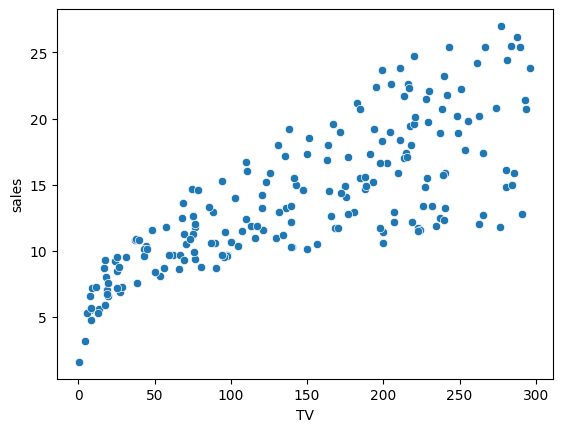

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
sns.scatterplot(x=adv["TV"], y=adv["sales"]);
#np.linspace(0,300)
#sns.lineplot(np.linspace(0,100))
'''
Designmatirce
B0 B1 
1  x0
1  x1
1  X2 
(m)+(k*x)
(B0)+(B1*x_n) = (y_n)
'''